#### ДЗ Марковские модели

— Скачайте текст войны и мир (ссылка на github и гугл диск). Очистите его, оставив только русские буквы и символы пробела. Постройте матрицу переходных вероятностей. Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы “Б” и имеющее длину 8-мь символов
— Выберите ряд и оцените его через HMM. Попробуйте “построить” (через среднее каждой компоненты) наивный прогноз ряда.

In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

In [2]:
for i in range(1,5):
    text = ''
    with open('./data/tom_'+str(i)+'.txt', 'r') as f:
        text = f.read().lower()
        text += text

In [3]:
text_ru = re.sub('[^а-я ]','', text)

In [4]:
len(text_ru)

1307094

In [5]:
# Построим матрицу переходных вероятностей

In [6]:
RUSSIAN = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя '
POS_RU = {l: i for i, l in enumerate(RUSSIAN)}

In [7]:
probabilities_ru = np.zeros((len(RUSSIAN), len(RUSSIAN)))

In [8]:
for cp, cn in zip(text_ru[:-1], text_ru[1:]):
    probabilities_ru[POS_RU[cp], POS_RU[cn]] += 1

In [9]:
probabilities_ru = (probabilities_ru / probabilities_ru.sum(axis=1)[:, None])

/home/pavel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [10]:
df_ru = pd.DataFrame(probabilities_ru, index=(c for c in RUSSIAN), columns=(c for c in RUSSIAN))

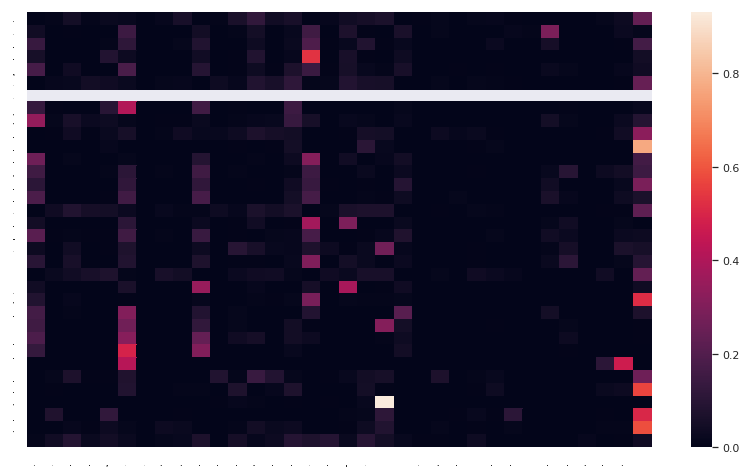

In [11]:
plt.figure(figsize=(14,8))
sns.heatmap(df_ru)
plt.show()

In [12]:
# Проверим вероятность найти строку мы

In [13]:
string = "мы"
proba = 1.0 / len(RUSSIAN)
for cp, cn in zip(string[1:], string[:-1]):
    proba *= probabilities_ru[POS_RU[cp], POS_RU[cn]]
print(proba)

0.0025163057729968587


In [14]:
# посчитаем вероятность встретить строку из 4-х символов, начинающуюся на п и заканчивающуюся на р

In [15]:
start = POS_RU['п']
end = POS_RU['р']
p = 0
prior = 1. / len(RUSSIAN)
for c in RUSSIAN:
    for d in RUSSIAN:
        proba = prior * probabilities_ru[start, POS_RU[c]] * probabilities_ru[POS_RU[c], POS_RU[d]]* probabilities_ru[POS_RU[d], end]
        if proba > 0:
            #print(''.join(['п', c, d, 'р']), proba)
            p += proba
print(p)

0.000919655523696363


In [20]:
# Сгенерируем слово, размером 8, начинующуюся с буквы б.

In [21]:
s = []
start = 'б'
s.append(start)
length = 7
for i in range(length):
    index = POS_RU[s[i]]
    next_char = np.random.choice(list(RUSSIAN), p=probabilities_ru[index])
    s.append(next_char)

print (''.join(s))

би па бы


###### Прогноз с использованием HMM

In [24]:
from hmmlearn.hmm import GaussianHMM

In [31]:
series = pd.read_csv("weekly-closings-of-the-dowjones-.csv").iloc[:,1]

In [33]:
values = series.values.reshape(-1,1)

In [40]:
len(values)

162

In [36]:
for n in range(1, 45):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

1 -894.2620483582117
2 -820.6341453620589
3 -786.8375332667551
4 -752.0201472669238
5 -737.1181370072733
6 -729.5671112589506
7 -713.7233991717259
8 -702.1073061994974
9 -690.9833067283263
10 -682.1267008563286
11 -682.0122706599453
12 -674.6658425181973
13 -661.9882973254136
14 -650.5398071662314
15 -640.3798032348406
16 -628.4730520369841
17 -624.2786530021177
18 -613.7927354539027
19 -616.0023134464495
20 -603.8729557851492
21 -602.1970206447822
22 -596.6356484669146
23 -597.5121109332025
24 -574.5781862140045
25 -573.8278106102529
26 -565.1625070947082
27 -558.5751048964329
28 -543.6130424125394
29 -535.9904124516997
30 -543.68175303005
31 -527.0662811559698
32 -526.0202460779482
33 -508.37283063771946
34 -501.6231079469391
35 -506.330145921453
36 -498.680013954302
37 -496.89159000308985
38 -479.1308759465535
39 -477.20128638390565
40 -469.2368324357605
41 -473.8356577959243
42 -458.9095198298222
43 -454.5252787633333
44 -452.09555575336594


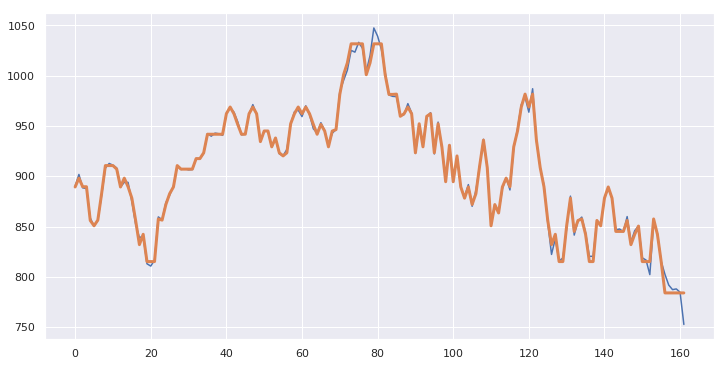

In [42]:
model = GaussianHMM(n_components=44,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)

In [ ]:
# модель довольно хорошо апроксимирует исходный ряд данных